# Baseline dynamics

Startup run in 3.92236590385437 secs.


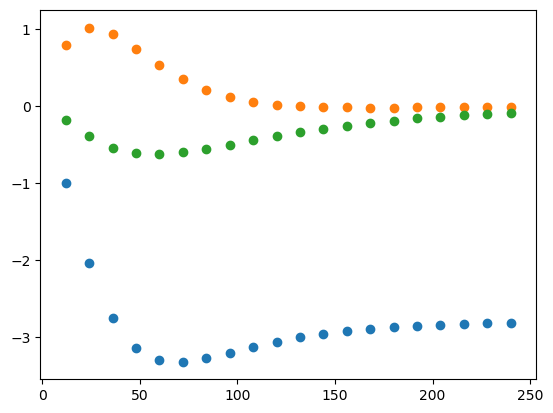

false

In [1]:
using NBInclude, DataFrames, XLSX
_VERS_ = :base
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/baseline")
dir_tab = joinpath(pwd(),"../empiricalmoments/results")
_tosave = false

In [2]:
println("Persistence of the shock: $(p.a)")
println("Magnitude of the shock: $(1-p.A_drop)")
println("Worker in-migration to utility, $(p.nuPhi)")
println("Firm in-migration to utility, $(p.nuPsi)")
println("Participation parameter, $(p.nuF)")
println("Participation shock, $(p.gamma)")
println("Inactivity shock, $(p.lambda)")
println("Firm destruction rate, $(p.delta)")
println("Steady-state firm inflow, $(p.Psi_star)")


### simulations before the graphs
simu = simulate(240, simpar, p)
mom = moments(simpar, p)
criterion(mom, simpar.data, verbose=true)

## how long for region to return to steady-state population
let 
    mysimu = simulate(1200, simpar, p)
    println(mysimu.t[end], " at ", mysimu.d[end])
    println(mysimu.t[end-1], " at ", mysimu.d[end-1]) ## population after 50 years
    println(mysimu.t[end-2], " at ", mysimu.d[end-2])
end

Persistence of the shock: 79.631263600718
Magnitude of the shock: 0.9215521685007289
Worker in-migration to utility, 0.06449929488793682
Firm in-migration to utility, 1.4965023959025525
Participation parameter, 1.2337220994416365
Participation shock, 0.015122305499866612
Inactivity shock, 0.009359593815516699
Firm destruction rate, 0.01818800529358229
Steady-state firm inflow, 0.011326556868192141
[0.006073092091225704, 0.038827111726553065, 0.006627080839396335, 0.051527284657175106]
1200.0 at 0.998645964798883
599.3987975951904 at 0.9908237162621513
399.19839679358716 at 0.9843867357393205


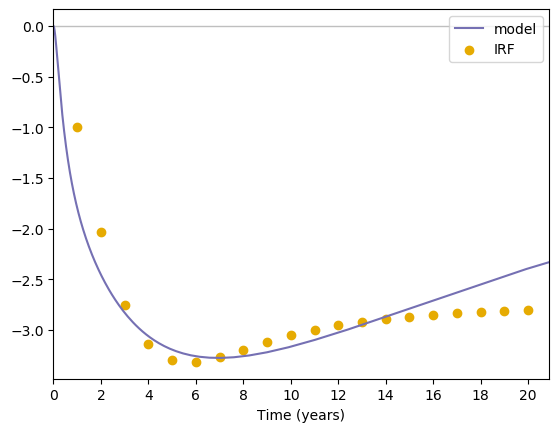

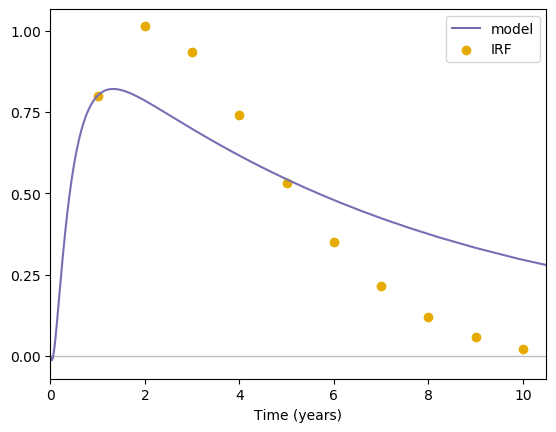

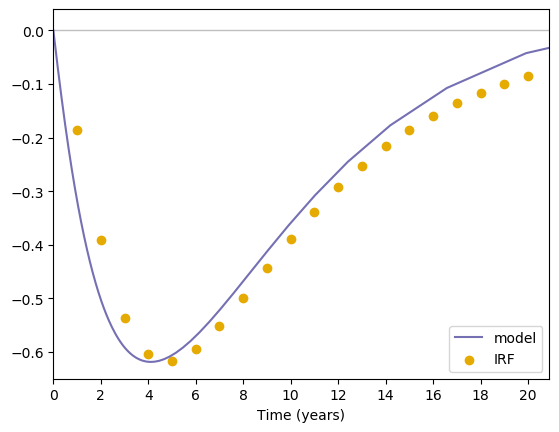

()

In [3]:
### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom,simpar.data.emp[xmom], c=myorange, label="IRF")
plot(simu.t ./ 12, (simu.m ./p.m_star .- 1) .* 100 , 
        c=colorvec[1], linestyle=lsvec[1], label="model")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
legend(loc=1)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom, simpar.data.urate[xmom], c=myorange, label="IRF")
plot(simu.t ./ 12, (simu.urate .- ((p.l_star-p.m_star)/(p.l_star)) ) .* 100 , 
    c=colorvec[1], linestyle=lsvec[1], label="model")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
legend(loc=1)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()


### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom, simpar.data.prate[xmom], c=myorange, label="IRF")
plot(simu.t ./ 12, (simu.prate .- (p.l_star/p.d_star) ) .* 100 , 
    c=colorvec[1], linestyle=lsvec[1], label="model")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
legend(loc=4)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()

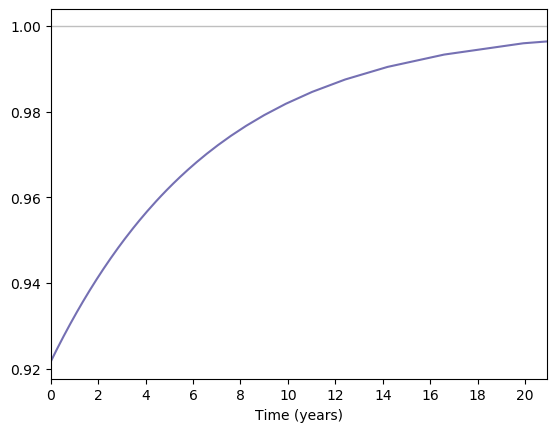

()

In [4]:
### TFP
figure() 
plot([0,24], fill(1,2), c=mygrey, lw=1)
plot(simu.t ./ 12, map(t->Atilde_fun(t,p), simu.t) , c=colorvec[1], linestyle=lsvec[1], label="model")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.02) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"TFP.png")) : ()

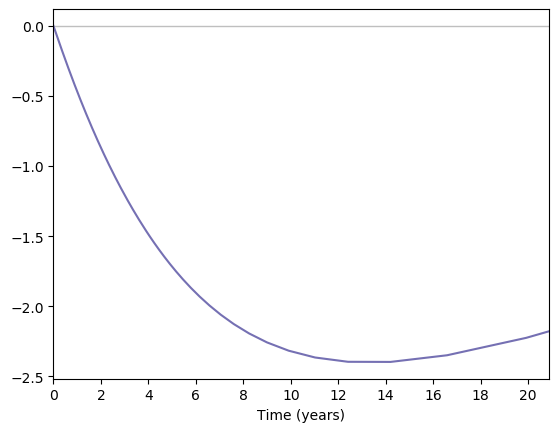

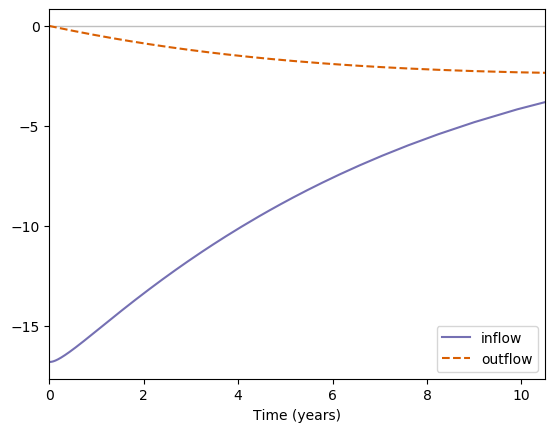

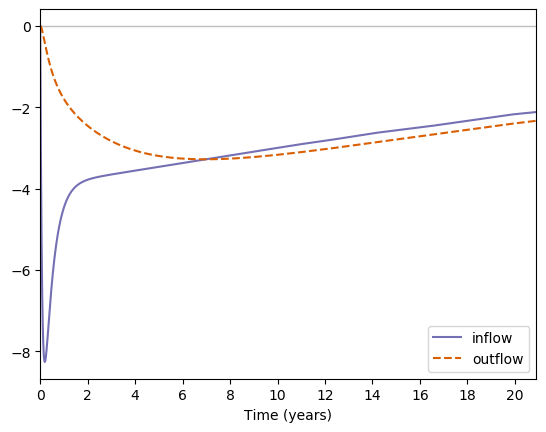

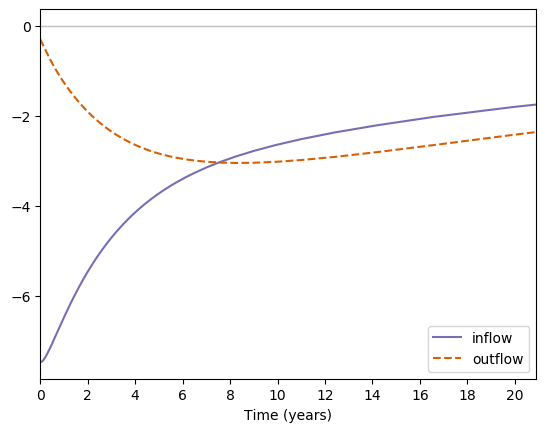

()

In [5]:
### population
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
plot(simu.t ./ 12, (simu.d./p.d_star .-1) .* 100 , c=colorvec[1], linestyle=lsvec[1])
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"population.png")) : ()


## flows workers/population
figure()
steadyvalue = p.Phi_star 
plot([0,30], fill(0, 2), c=mygrey, lw=1, label="")
plot(simu.t ./ 12, (simu.d_in ./ steadyvalue .- 1) .* 100 , c=colorvec[1], linestyle=lsvec[1], label="inflow")
plot(simu.t ./ 12, (simu.d_out ./ steadyvalue .- 1)  .* 100 , c=colorvec[2], linestyle=lsvec[2], label="outflow")
legend()
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"populationflows.png")) : ()


## flows workers in and out of employment
figure()
steadyvalue = (p.rho + p.lambda+ p.delta) * p.m_star
plot([0,30], fill(0, 2), c=mygrey, lw=1, label="")
plot(simu.t ./ 12, (simu.m_in ./ steadyvalue .- 1) .* 100 , c=colorvec[1], linestyle=lsvec[1], label="inflow")
plot(simu.t ./ 12, (simu.m_out ./ steadyvalue .- 1)  .* 100 , c=colorvec[2], linestyle=lsvec[2], label="outflow")
legend()
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employmentflows.png")) : ()


## flows workers in and out of participation
figure()
F_star = F_fun(p.P_star, p.nuF)
steadyvalue = F_star * p.Phi_star + (p.chi + p.gamma * F_star) * (p.d_star - p.l_star)
plot([0,30], fill(0, 2), c=mygrey, lw=1, label="")
plot(simu.t ./ 12, (simu.l_in ./ steadyvalue .- 1) .* 100 , c=colorvec[1], linestyle=lsvec[1], label="inflow")
plot(simu.t ./ 12, (simu.l_out ./ steadyvalue .- 1)  .* 100 , c=colorvec[2], linestyle=lsvec[2], label="outflow")
legend()
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"participationflows.png")) : ()

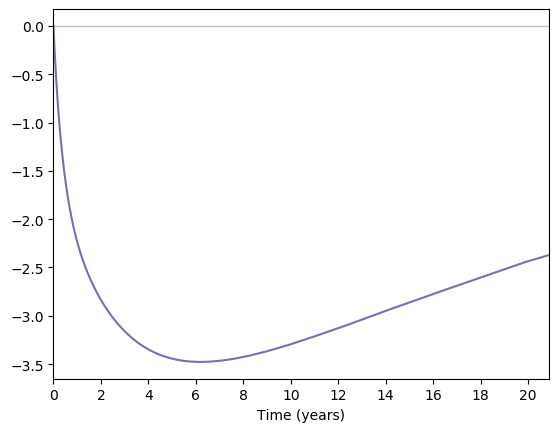

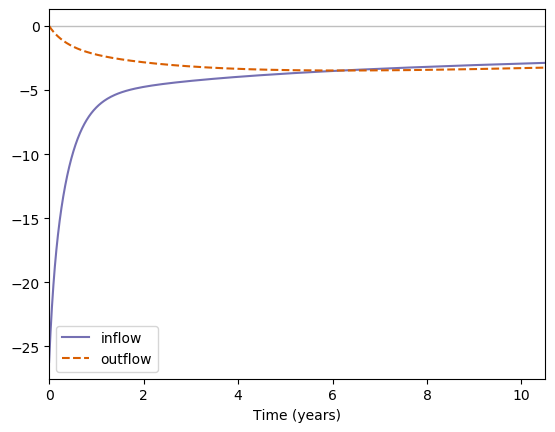

()

In [6]:
### firms
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
plot(simu.t ./ 12, (simu.n./p.n_star .-1) .* 100 , c=colorvec[1], linestyle=lsvec[1])
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"firms.png")) : ()



## flows firms
figure()
steadyvalue = p.Psi_star 
plot([0,30], fill(0,2), c=mygrey, lw=1, label="")
plot(simu.t ./ 12, (simu.n_in ./steadyvalue .- 1) .* 100 , c=colorvec[1], linestyle=lsvec[1],  label="inflow")
plot(simu.t ./ 12, (simu.n_out ./steadyvalue .- 1) .* 100 , c=colorvec[2], linestyle=lsvec[2], label="outflow")
legend()
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"firmflows.png")) : ()


Worker inflow starts at -16.787831900706173%
Firm inflow starts at -26.20467418985032%


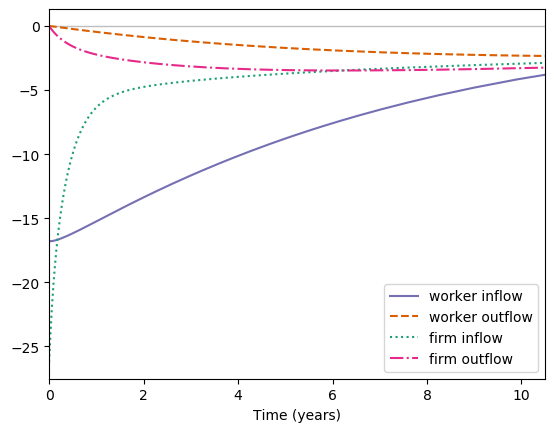

()

In [7]:
## flows population and firms
figure()
steadyvalue1 = p.Phi_star 
plot([0,30], fill(0,2), c=mygrey, lw=1, label="")
plot(simu.t ./ 12, (simu.d_in ./ steadyvalue1 .- 1) .* 100 , c=colorvec[1], linestyle=lsvec[1], label="worker inflow")
plot(simu.t ./ 12, (simu.d_out ./ steadyvalue1 .- 1)  .* 100 , c=colorvec[2], linestyle=lsvec[2], label="worker outflow")
println("Worker inflow starts at ",  (simu.d_in[1] ./ steadyvalue1 .- 1) .* 100 , "%")
steadyvalue2 = p.Psi_star 
plot(simu.t ./ 12, (simu.n_in ./steadyvalue2 .- 1) .* 100 , c=colorvec[3], linestyle=lsvec[3],  label="firm inflow")
plot(simu.t ./ 12, (simu.n_out ./steadyvalue2 .- 1) .* 100 , c=colorvec[4], linestyle=lsvec[4], label="firm outflow")
println("Firm inflow starts at ",  (simu.n_in[1] ./ steadyvalue2 .- 1) .* 100 , "%")
legend(loc=4)
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"workerfirmflows.png")) : ()

Worker inflow rate starts at -16.787831900706173%


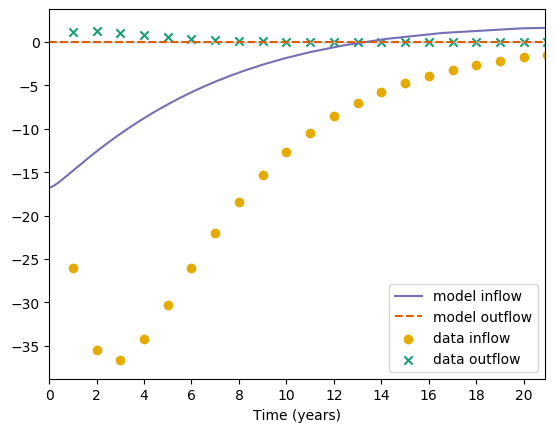

()

In [8]:
## flows population and data
mydata = let
    inmig = Matrix{Float64}(XLSX.readxlsx(joinpath(dir_tab,"HandIRF_RFIV_migration.xlsx"))["Sheet1"][3:end,23])
    outmig = Matrix{Float64}(XLSX.readxlsx(joinpath(dir_tab,"HandIRF_RFIV_migration.xlsx"))["Sheet1"][3:end,25])
    out = DataFrame(inflow = inmig[:] .* 100, outflow=outmig[:] .* 100)
    out.t = collect(1:length(inmig[:]))
    out
end


figure()
steadyvalue1 = p.Phi_star /p.d_star
plot([0,30], fill(0,2), c=mygrey, lw=1, label="")
plot(simu.t ./ 12, (simu.d_in ./ simu.d ./ steadyvalue1 .- 1) .* 100 , c=colorvec[1], linestyle=lsvec[1], label="model inflow")
plot(simu.t ./ 12, (simu.d_out ./ simu.d ./ steadyvalue1 .- 1)  .* 100 , c=colorvec[2], linestyle=lsvec[2], label="model outflow")
scatter(mydata.t, mydata.inflow, c=myorange, label="data inflow")
scatter(mydata.t, mydata.outflow, c=colorvec[3], marker="x", label="data outflow")
println("Worker inflow rate starts at ",  (simu.d_in[1] / simu.d[1] ./ steadyvalue1 .- 1) .* 100 , "%")
legend(loc=4)
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"workerflowrates.png")) : ()